In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statistics import stdev

Create function to removes data beyond 2 standard deviations and load in data

In [3]:


def remove_outliers(data):

    threshold = 2
    
    dev = stdev(data[1])
    mean = np.mean(data[1])

    data = np.delete(data, np.where(abs((data[1] - mean)/dev) > threshold), axis=1)

    return data

        



heights = [1.6, 1.65, 1.7, 1.73, 1.8, 2.3, 1.78, 1.28, 1.9]

weights = [60, 65, 72.3, 75, 80, 199, 87, 78, 90]


r1 = np.array([heights, weights])

Plot the loaded data

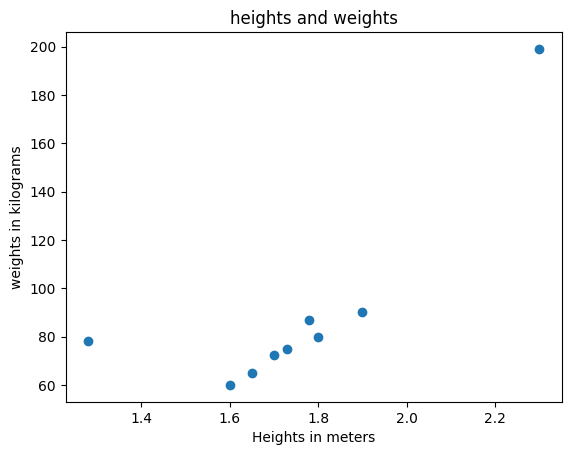

In [4]:
plt.title("heights and weights")
plt.xlabel('Heights in meters')
plt.ylabel("weights in kilograms")


plt.scatter(r1[0], r1[1])

remove outliers and create model

In [14]:
r1 = remove_outliers(r1)

model = LinearRegression()


xtrain, xtest, ytrain, ytest = train_test_split(r1[0], r1[1], test_size = .2)

heights = xtrain.reshape(len(xtrain), 1)
weights = ytrain.reshape(len(ytrain), 1)

ytest = ytest.reshape(len(ytest), 1)
xtest = xtest.reshape(len(xtest), 1)


model.fit(X=heights, y=weights)

LinearRegression()

Plot initial data with the models regression line

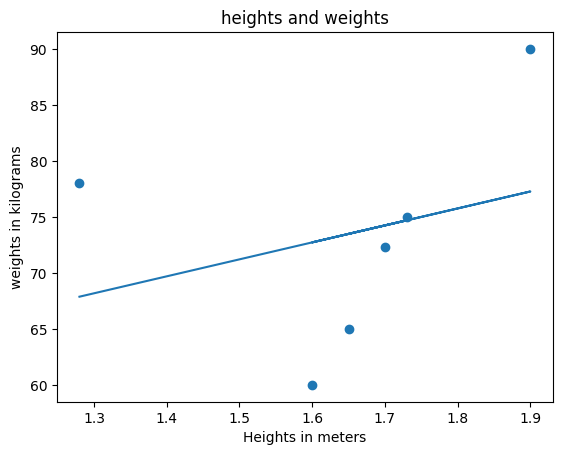

In [15]:
plt.title("heights and weights")
plt.xlabel('Heights in meters')
plt.ylabel("weights in kilograms")

plt.scatter(heights, weights)

plt.plot(heights, model.predict(heights))

test model

In [16]:
model.predict([[1.5]])

array([[71.21132046]])

score model

In [17]:
print(model.score(xtest, ytest))

-5.175607290175829
